In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
! pip install nltk
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163337 sha256=0eb38e7b3e1b5ca5ad36f0644770d476709b7d4f91e862c831d1458ecd7f1f30
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
'''This block is irrelevant'''
import csv
import numpy as np
import pandas as pd

airlines_df = pd.read_csv('airlines.csv')
airlines_df.head()

FileNotFoundError: ignored

In [ ]:
'''This block is irrelevant'''

airlines_df["Airport.Name"].unique()

array(['Atlanta, GA: Hartsfield-Jackson Atlanta International',
       'Boston, MA: Logan International',
       'Baltimore, MD: Baltimore/Washington International Thurgood Marshall',
       'Charlotte, NC: Charlotte Douglas International',
       'Washington, DC: Ronald Reagan Washington National',
       'Denver, CO: Denver International',
       'Dallas/Fort Worth, TX: Dallas/Fort Worth International',
       'Detroit, MI: Detroit Metro Wayne County',
       'Newark, NJ: Newark Liberty International',
       'Fort Lauderdale, FL: Fort Lauderdale-Hollywood International',
       'Washington, DC: Washington Dulles International',
       'Houston, TX: George Bush Intercontinental/Houston',
       'New York, NY: John F. Kennedy International',
       'Las Vegas, NV: McCarran International',
       'Los Angeles, CA: Los Angeles International',
       'New York, NY: LaGuardia', 'Orlando, FL: Orlando International',
       'Chicago, IL: Chicago Midway International',
       'Miami, FL: Mia

In [ ]:
import csv
import numpy as np
import pandas as pd

ratings_df = pd.read_csv('airlines_ratings.csv', encoding='latin-1')
ratings_df.head()

,id,airline,date,location,rating,cabin,value,recommended,review
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...


Text(0.5, 1.0, 'Distribution of Rating')

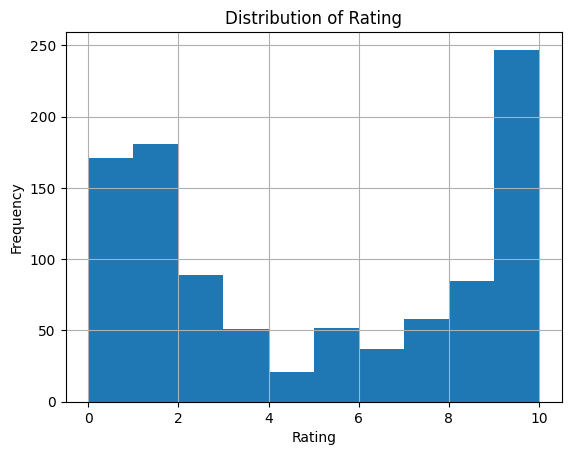

In [ ]:
import matplotlib.pyplot as plt

ratings_df['rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')

Text(0.5, 1.0, 'Distribution of cabin')

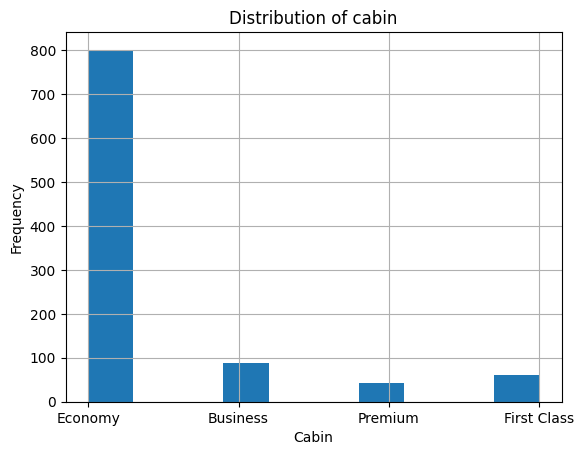

In [ ]:
ratings_df['cabin'].unique()
ratings_df['cabin'].hist()
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Distribution of cabin')

0      7
1      0
2      0
3      9
4      7
      ..
987    1
988    2
989    3
990    1
991    1
Name: rating, Length: 992, dtype: int64


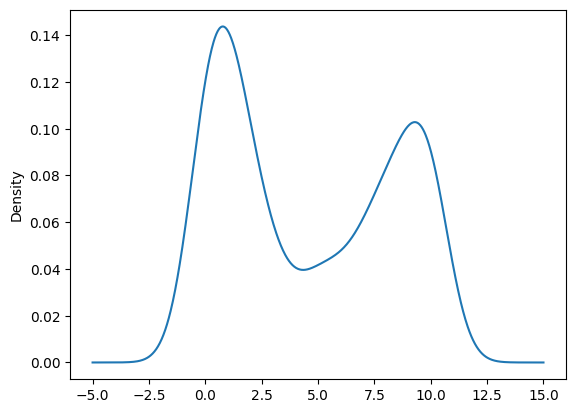

In [ ]:
#ratings_df['rating'].plot(kind='kde')
ratings_df['rating'].plot.kde()
print(ratings_df['rating'])

Text(0.5, 0, 'value')

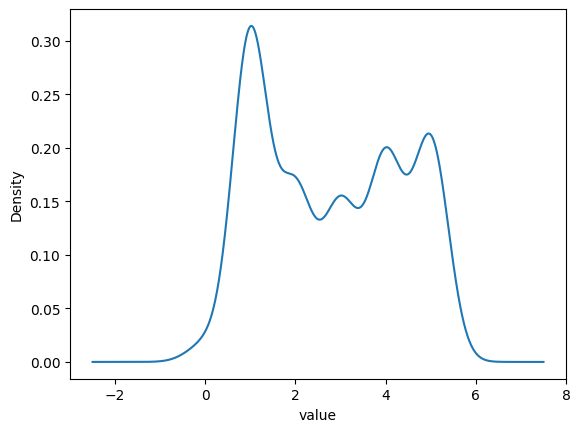

In [ ]:
ratings_df['value'].plot(kind='kde')
plt.xlabel('value')


In [ ]:
ratings_df['value'].unique()

array([4, 2, 1, 3, 5, 0])

Text(0.5, 1.0, 'Distribution of Value')

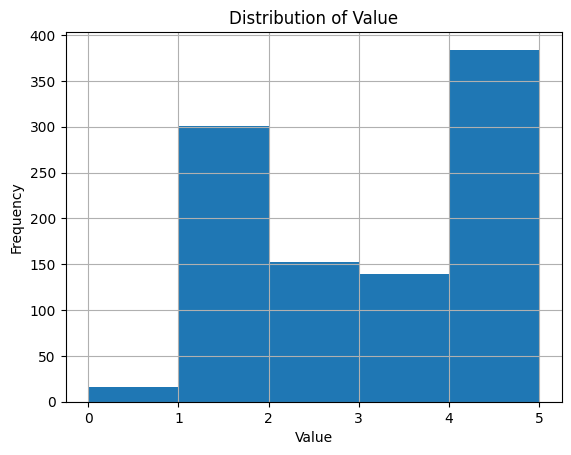

In [ ]:
ratings_df['value'].hist(bins = 5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Value')

In [ ]:
mean_ratings = ratings_df.groupby('airline')['rating'].mean().reset_index()
mean_ratings

,airline,rating
0,American Airlines,6.581081
1,Delta Air Lines,5.161943
2,Southwest Airlines,5.937198
3,US Airways,3.152263
4,United Airlines,3.520362


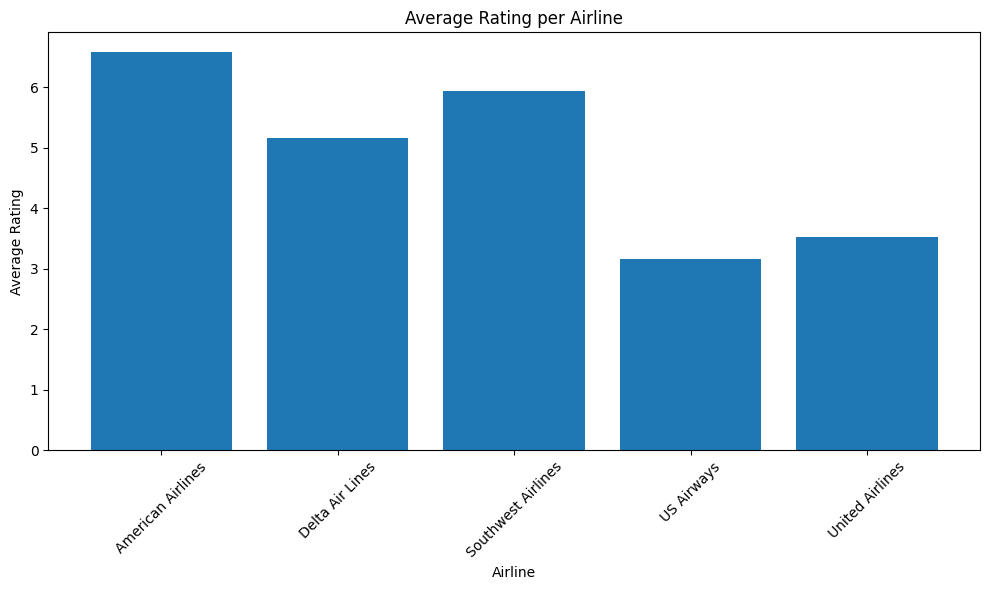

In [ ]:
plt.figure(figsize=(10,6))  # Optional: Sets the figure size
plt.bar(mean_ratings['airline'], mean_ratings['rating'])  # Creates a bar chart

plt.xlabel('Airline')  # Labels the x-axis as 'Airline'
plt.ylabel('Average Rating')  # Labels the y-axis as 'Average Rating'
plt.title('Average Rating per Airline')  # Adds a title
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot params for better layout

plt.show()

In [ ]:
mean_values = ratings_df.groupby('airline')['value'].mean().reset_index()
mean_values

,airline,value
0,American Airlines,2.729730
1,Delta Air Lines,2.995951
2,Southwest Airlines,3.545894
3,US Airways,2.353909
4,United Airlines,2.312217


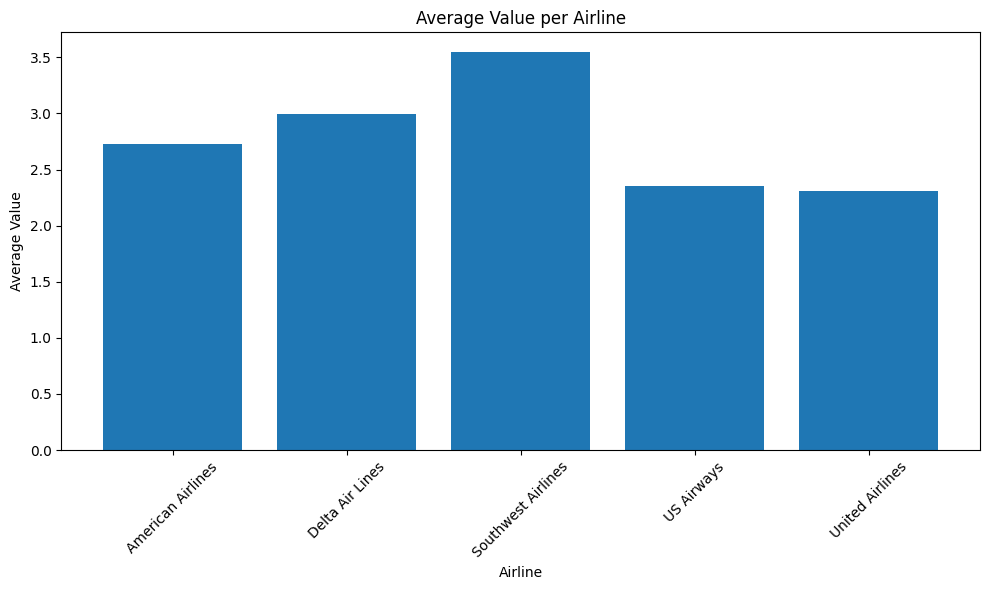

In [ ]:
plt.figure(figsize=(10,6))  # Optional: Sets the figure size
plt.bar(mean_values['airline'], mean_values['value'])  # Creates a bar chart

plt.xlabel('Airline')  # Labels the x-axis as 'Airline'
plt.ylabel('Average Value')  # Labels the y-axis as 'Average Rating'
plt.title('Average Value per Airline')  # Adds a title
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot params for better layout

plt.show()

In [ ]:
value_rating_mean = ratings_df.groupby('value')['rating'].mean().reset_index()
rating_value_mean = ratings_df.groupby('rating')['value'].mean().reset_index()


In [ ]:
mean_values = ratings_df.groupby('airline')[['rating', 'value']].mean().reset_index()
mean_values

,airline,rating,value
0,American Airlines,6.581081,2.729730
1,Delta Air Lines,5.161943,2.995951
2,Southwest Airlines,5.937198,3.545894
3,US Airways,3.152263,2.353909
4,United Airlines,3.520362,2.312217


Text(0.5, 1.0, 'Correlation between Average Value per Rating')

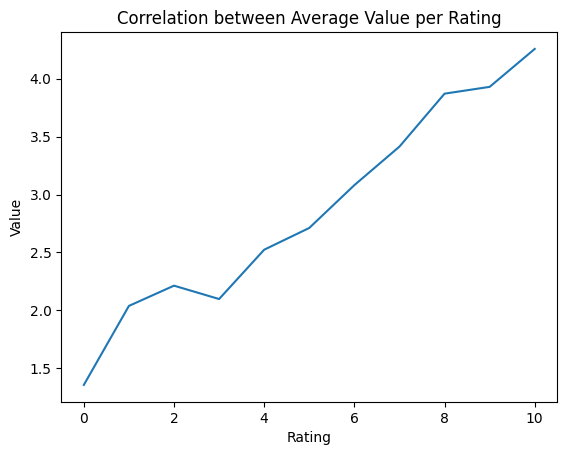

In [ ]:
rating_value_mean['value'].plot()
plt.xlabel('Rating')
plt.ylabel('Value')
plt.title('Correlation between Average Value per Rating')

Text(0.5, 1.0, 'Correlation between Average Rating per Value')

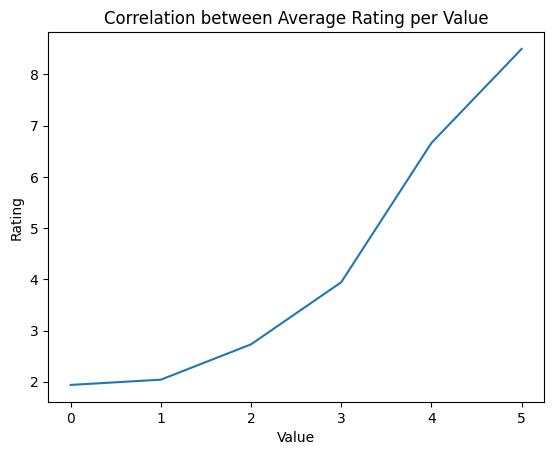

In [ ]:
value_rating_mean['rating'].plot()
plt.xlabel('Value')
plt.ylabel('Rating')
plt.title('Correlation between Average Rating per Value')

In [ ]:
correlation = ratings_df[['value', 'rating']].corr(method='spearman')
print("Correlation coefficient:", correlation.iloc[0, 1])

Correlation coefficient: 0.6496300557523179


In [ ]:
import nltk
import re

from nltk.corpus import stopwords
nltk.download("stopwords")

stopwords_ = set(stopwords.words("english"))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"[^A-Za-z0-9\s]+", "", text)
  tokens = text.split()
  clean_tokens = [t for t in tokens if len(t) > 1]
  clean_tokens = [t for t in clean_tokens if not t in stopwords_]
  clean_text = " ".join(clean_tokens)
  return clean_text

In [ ]:
clean_text(',Flew Mar 30 NRT to BKK. All flights were great. Flight was on-time and the in-flight entertainment was great. Apart from the meals - some Thai passengers cannot eat beef so the flight crews tried to ask other passengers who could eat beef and changed the meals around. We feel disappointed with their food services.')

'flew mar 30 nrt bkk flights great flight ontime inflight entertainment great apart meals thai passengers cannot eat beef flight crews tried ask passengers could eat beef changed meals around feel disappointed food services'

In [ ]:
ratings_df['clean_review'] = ratings_df['review'].apply(lambda x: clean_text(str(x)))

In [ ]:
ratings_df.head(10)

,id,airline,date,location,rating,cabin,value,recommended,review,clean_review
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...,flew mar 30 nrt bkk flights great flight ontim...
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...,flight 2463 leaving west palm beach pbi 242pm ...
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...,delta website froze times trying set flight th...
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...,returned roundtrip firstbusiness elite fllatlm...
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...,roundtrip flight quito ecuador birmingham alab...
5,10006,Delta Air Lines,2015-06-17,USA,9,Business,5,YES,Narita - Bangkok June 13 Business Elite 747. S...,narita bangkok june 13 business elite 747 slig...
6,10007,Delta Air Lines,2015-06-14,UK,0,Economy,1,NO,Flight from NY La Guardia to Cleveland OH at 0...,flight ny la guardia cleveland oh 0115am email...
7,10008,Delta Air Lines,2015-06-14,USA,0,Economy,1,NO,Originally I had a 2 hour layover. Delta chang...,originally hour layover delta changed flights ...
8,10009,Delta Air Lines,2015-06-13,USA,4,Business,2,NO,We flew paid business class fares in Delta's B...,flew paid business class fares deltas business...
9,10010,Delta Air Lines,2015-06-13,UK,9,Economy,3,YES,I flew from Heathrow to Seattle. To be honest ...,flew heathrow seattle honest dreading flight r...


In [ ]:
from textblob import TextBlob


# Extract sentiment polarity
ratings_df['sentiment'] = ratings_df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
ratings_df.head(10)

,id,airline,date,location,rating,cabin,value,recommended,review,clean_review,sentiment
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...,flew mar 30 nrt bkk flights great flight ontim...,0.181250
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...,flight 2463 leaving west palm beach pbi 242pm ...,0.177841
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...,delta website froze times trying set flight th...,-0.125541
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...,returned roundtrip firstbusiness elite fllatlm...,0.159809
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...,roundtrip flight quito ecuador birmingham alab...,-0.123750
5,10006,Delta Air Lines,2015-06-17,USA,9,Business,5,YES,Narita - Bangkok June 13 Business Elite 747. S...,narita bangkok june 13 business elite 747 slig...,0.272243
6,10007,Delta Air Lines,2015-06-14,UK,0,Economy,1,NO,Flight from NY La Guardia to Cleveland OH at 0...,flight ny la guardia cleveland oh 0115am email...,0.042857
7,10008,Delta Air Lines,2015-06-14,USA,0,Economy,1,NO,Originally I had a 2 hour layover. Delta chang...,originally hour layover delta changed flights ...,0.287054
8,10009,Delta Air Lines,2015-06-13,USA,4,Business,2,NO,We flew paid business class fares in Delta's B...,flew paid business class fares deltas business...,0.145794
9,10010,Delta Air Lines,2015-06-13,UK,9,Economy,3,YES,I flew from Heathrow to Seattle. To be honest ...,flew heathrow seattle honest dreading flight r...,0.256818


In [ ]:
ratings_df['clean_sentiment'] = ratings_df['clean_review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
ratings_df.head(10)

,id,airline,date,location,rating,cabin,value,recommended,review,clean_review,sentiment,clean_sentiment
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...,flew mar 30 nrt bkk flights great flight ontim...,0.181250,0.283333
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...,flight 2463 leaving west palm beach pbi 242pm ...,0.177841,0.177841
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...,delta website froze times trying set flight th...,-0.125541,-0.150649
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...,returned roundtrip firstbusiness elite fllatlm...,0.159809,0.125758
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...,roundtrip flight quito ecuador birmingham alab...,-0.123750,-0.112500
5,10006,Delta Air Lines,2015-06-17,USA,9,Business,5,YES,Narita - Bangkok June 13 Business Elite 747. S...,narita bangkok june 13 business elite 747 slig...,0.272243,0.282213
6,10007,Delta Air Lines,2015-06-14,UK,0,Economy,1,NO,Flight from NY La Guardia to Cleveland OH at 0...,flight ny la guardia cleveland oh 0115am email...,0.042857,0.150000
7,10008,Delta Air Lines,2015-06-14,USA,0,Economy,1,NO,Originally I had a 2 hour layover. Delta chang...,originally hour layover delta changed flights ...,0.287054,0.490179
8,10009,Delta Air Lines,2015-06-13,USA,4,Business,2,NO,We flew paid business class fares in Delta's B...,flew paid business class fares deltas business...,0.145794,0.120422
9,10010,Delta Air Lines,2015-06-13,UK,9,Economy,3,YES,I flew from Heathrow to Seattle. To be honest ...,flew heathrow seattle honest dreading flight r...,0.256818,0.324198


In [ ]:
# Sentiment without removing stopwords etc.
aggregate_sentiment = ratings_df.groupby('airline')['sentiment'].mean().reset_index()
top_airlines = aggregate_sentiment.sort_values(by='sentiment', ascending=False).head(n=5)
top_airlines

,airline,sentiment
1,Delta Air Lines,0.138914
2,Southwest Airlines,0.090851
0,American Airlines,0.073286
3,US Airways,0.040448
4,United Airlines,0.032317


In [ ]:
aggregate_sentiment_md = ratings_df.groupby('airline')['sentiment'].median().reset_index()
top_airlines_median = aggregate_sentiment_md.sort_values(by='sentiment', ascending=False).head(n=5)
top_airlines_median

,airline,sentiment
1,Delta Air Lines,0.144444
2,Southwest Airlines,0.084295
0,American Airlines,0.072224
3,US Airways,0.025000
4,United Airlines,0.020608


In [ ]:
# Sentiment with removing stopwords etc.
aggregate_sentiment_clean = ratings_df.groupby('airline')['clean_sentiment'].mean().reset_index()
top_airlines_clean = aggregate_sentiment_clean.sort_values(by='clean_sentiment', ascending=False).head(n=5)
top_airlines_clean

,airline,clean_sentiment
1,Delta Air Lines,0.148281
2,Southwest Airlines,0.085731
0,American Airlines,0.071749
3,US Airways,0.042807
4,United Airlines,0.036581


In [ ]:
aggregate_sentiment_clean_md = ratings_df.groupby('airline')['clean_sentiment'].median().reset_index()
top_airlines_clean_median = aggregate_sentiment_clean_md.sort_values(by='clean_sentiment', ascending=False).head(n=5)
top_airlines_clean_median

,airline,clean_sentiment
1,Delta Air Lines,0.147727
0,American Airlines,0.087419
2,Southwest Airlines,0.082386
4,United Airlines,0.034635
3,US Airways,0.025000


In [ ]:
correlation = ratings_df[['value', 'rating']].corr(method='spearman')
print("Correlation coefficient:", correlation.iloc[0, 1])

Correlation coefficient: 0.6496300557523179


In [ ]:
correlation = ratings_df[['rating', 'clean_sentiment']].corr(method='spearman')
print("Correlation coefficient:", correlation.iloc[0, 1])

Correlation coefficient: 0.4119803148247808


In [ ]:
correlation = ratings_df[['rating', 'clean_sentiment']].corr(method='spearman')
print("Correlation coefficient:", correlation.iloc[0, 1])

Correlation coefficient: 0.4119803148247808


In [ ]:
# Function that returns true if cabin list only has values from valid list, otherwise false
'''def valid_cabin_class(cabin_list, dataframe):
  valid_list = ['economy','business','premium','first class']
  valid_value = all(cabin.lower() in valid_list for cabin in cabin_list)
  return valid_value'''

In [ ]:
print(ratings_df['airline'].unique())

['Delta Air Lines' 'US Airways' 'Southwest Airlines' 'American Airlines'
 'United Airlines']


In [ ]:
# Function that returns true if cabin list only has values from valid list, otherwise false
def valid_column_class(values_list, dataframe, column):
  valid_list = list(dataframe[column].unique())
  valid_list = [value.lower() for value in valid_list]
  valid_value = all(value.lower() in valid_list for value in values_list)
  return valid_value

In [ ]:
def valid_cabin_class(cabin_list, dataframe):
  return valid_column_class(cabin_list, dataframe, 'cabin')

In [ ]:
valid_cabin_class([], ratings_df)

True

In [ ]:
valid_column_class(['USA', 'UK', 'Australia'], ratings_df, 'location')

True

In [ ]:
# Function that returns pandas dataframe where only rows where column matches
def return_filter_column(values_list, dataframe, column):
  value_list = [value.lower() for value in values_list]
  if valid_column_class(values_list, dataframe, column):
    if values_list == []:
      return dataframe
    new_dataframe = dataframe[dataframe[column].str.lower().isin(values_list)]
    return new_dataframe

In [ ]:
# Function that returns pandas df where only rows where column cabin has a value from cabin list
'''def return_filter_cabins(original_df, cabin_list):
  cabin_list = [cabin.lower() for cabin in cabin_list]
  if valid_cabin_class(cabin_list):
    if cabin_list == []:
      return original_df
    new_dataframe = original_df[original_df['cabin'].str.lower().isin(cabin_list)]
    return new_dataframe'''

In [ ]:
def return_filter_cabins(values_list, dataframe):
  return return_filter_column(values_list, dataframe, 'cabin')


In [ ]:
# Test that the function works
return_filter_cabins([],ratings_df).head()

,id,airline,date,location,rating,cabin,value,recommended,review,clean_review,sentiment,clean_sentiment
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...,flew mar 30 nrt bkk flights great flight ontim...,0.181250,0.283333
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...,flight 2463 leaving west palm beach pbi 242pm ...,0.177841,0.177841
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...,delta website froze times trying set flight th...,-0.125541,-0.150649
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...,returned roundtrip firstbusiness elite fllatlm...,0.159809,0.125758
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...,roundtrip flight quito ecuador birmingham alab...,-0.123750,-0.112500


In [ ]:
# cabin_list should be a list of suitable cabin classes.
# If empty/None all cabin classes are used
# The values in the list should be: 'economy', 'business', 'premium' or 'first class'

# Recommender system based on the sentiment of all the reviews of the airlines
'''def rec_sys_airlines_sentiment(cabin_list,dataframe):
  #global ratings_df
  if not valid_cabin_class(cabin_list) or cabin_list == None:
    rec_sys_airlines_sentiment([])
  else:
    relevant_pd = return_filter_cabins(dataframe,cabin_list)
    aggregate_sentiment = relevant_pd.groupby('airline')['clean_sentiment'].median().reset_index()
    top_airlines = aggregate_sentiment.sort_values(by='clean_sentiment', ascending=False).head(n=5)
    return top_airlines'''


In [ ]:
def rec_sys_airlines_sentiment(values_list, dataframe, column):
  #global ratings_df
  values_list = [value.lower() for value in values_list]
  if not valid_column_class(values_list, dataframe, column) or values_list == None:
    rec_sys_airlines_sentiment([], dataframe, column)
  else:
    relevant_df = return_filter_column(values_list, dataframe, column)
    aggregate_sentiment = relevant_df.groupby('airline')['clean_sentiment'].median().reset_index()
    top_airlines = aggregate_sentiment.sort_values(by='clean_sentiment', ascending=False).head(n=5)
    return top_airlines

Testing of Recommender System based on which cabin type you prefer and what the sentiment of those reviews fitting to your cabin type is.



In [ ]:
rec_sys_airlines_sentiment(['Premium'], ratings_df, 'cabin')

,airline,clean_sentiment
1,Southwest Airlines,0.187500
0,Delta Air Lines,0.137500
3,United Airlines,0.046412
2,US Airways,-0.108333


In [ ]:
rec_sys_airlines_sentiment(['usa'], ratings_df, 'location')


,airline,clean_sentiment
1,Delta Air Lines,0.126894
2,Southwest Airlines,0.074211
0,American Airlines,0.031250
4,United Airlines,0.030303
3,US Airways,0.003636


In [ ]:
def rec_sys_airlines_sentiment_weighted(values_list, dataframe, column):
    values_list = [value.lower() for value in values_list]

    if not valid_column_class(values_list, dataframe, column) or values_list is None:
          rec_sys_airlines_sentiment([], dataframe, column)
    else:
        relevant_df = dataframe[dataframe[column].str.lower().isin(values_list)]

        # Calculate average sentiment for each airline and category
        avg_sentiments = []
        for airline in relevant_df['airline'].unique():
            airline_df = relevant_df[relevant_df['airline'] == airline]
            for value in values_list:
                value_df = airline_df[airline_df[column].str.lower() == value]
                avg_sentiment = value_df['clean_sentiment'].median()
                avg_sentiments.append({'airline': airline, 'value': value, 'avg_sentiment': avg_sentiment})

        # Convert the results to a DataFrame
        avg_df = pd.DataFrame(avg_sentiments)

        # Handle missing values if any category is missing for an airline
        avg_df = avg_df.pivot_table(index='airline', columns='value', values='avg_sentiment').reset_index()

        # Calculate the average of averages for each airline
        avg_df['final_score'] = avg_df.mean(axis=1)

        # Sort the airlines by final score and return the top 5
        top_airlines = avg_df[['airline', 'final_score']].sort_values(by='final_score', ascending=False).head(5)

        return top_airlines

In [ ]:
rec_sys_airlines_sentiment_weighted(['usa'], ratings_df, 'location')


<ipython-input-46-c2bb8d7e6294>:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_df['final_score'] = avg_df.mean(axis=1)


value,airline,final_score
1,Delta Air Lines,0.126894
2,Southwest Airlines,0.074211
0,American Airlines,0.031250
4,United Airlines,0.030303
3,US Airways,0.003636


In [ ]:
# Recommender system based on the ratings of each airline(Not the review)
'''
def rec_sys_airlines_rating(cabin_list, dataframe):
  global ratings_df
  if not valid_cabin_class(cabin_list) or cabin_list == None:
    rec_sys_airlines_rating([])
  else:
    relevant_pd = return_filter_cabins(ratings_df,cabin_list)
    aggregate_sentiment = relevant_pd.groupby('airline')['rating'].median().reset_index()
    top_airlines = aggregate_sentiment.sort_values(by='rating', ascending=False).head(n=5)
    return top_airlines
'''
def rec_sys_airlines_rating(values_list, dataframe, column):
  values_list = [value.lower() for value in values_list]
  if not valid_column_class(values_list, dataframe, column) or values_list == None:
    rec_sys_airlines_rating([], dataframe, column)
  else:
    relevant_df = return_filter_column(values_list, dataframe, column)
    aggregate_sentiment = relevant_df.groupby('airline')['rating'].median().reset_index()
    top_airlines = aggregate_sentiment.sort_values(by='rating', ascending=False).head(n=5)
    return top_airlines

Testing of Recommender System based on  which cabin type you prefer and the rating of those reviews fitting to your cabin type is.




In [ ]:
rec_sys_airlines_rating([],ratings_df,'cabin')

,airline,rating
0,American Airlines,9.0
2,Southwest Airlines,7.0
1,Delta Air Lines,6.0
4,United Airlines,2.0
3,US Airways,1.0


In [ ]:
#location_list = list(ratings_df['location'].unique())
#for location in location_list
ratings_df['location'].value_counts()

USA                   674
UK                    121
Canada                 57
Australia              27
Ireland                12
Germany                12
France                  9
Italy                   7
Thailand                6
New Zealand             6
Switzerland             6
Singapore               6
Belgium                 5
Netherlands             5
South Africa            4
Brazil                  3
China                   2
Philippines             2
India                   2
Mexico                  2
Puerto Rico             2
Indonesia               2
Poland                  1
Qatar                   1
Russia                  1
Taiwan                  1
Venezuela               1
Dominican Republic      1
Israel                  1
Finland                 1
Sweden                  1
Slovakia                1
Spain                   1
Denmark                 1
Greece                  1
Turkey                  1
Japan                   1
Hong Kong               1
Sri Lanka   

In [ ]:
ratings_df['cabin'].value_counts()

Economy        801
Business        89
First Class     60
Premium         42
Name: cabin, dtype: int64

In [ ]:
ratings_df['cabin'].unique()

array(['Economy', 'Business', 'Premium', 'First Class'], dtype=object)

In [ ]:
def convert_recommended_column(dataframe):
    dataframe['recommended'] = dataframe['recommended'].apply(lambda x: 1 if x == 'YES' else 0)
    return dataframe

In [ ]:
ratings_df = convert_recommended_column(ratings_df)

In [ ]:
airline_metrics = ratings_df.groupby('airline').agg({
    'rating': 'mean',
    'clean_sentiment': 'mean',
    'sentiment': 'mean',
    'value': 'mean',
    'recommended': 'mean'
}).reset_index()

In [ ]:
airline_metrics

,airline,rating,clean_sentiment,sentiment,value,recommended
0,American Airlines,6.581081,0.071749,0.073286,2.729730,0.324324
1,Delta Air Lines,5.161943,0.148281,0.138914,2.995951,0.518219
2,Southwest Airlines,5.937198,0.085731,0.090851,3.545894,0.425121
3,US Airways,3.152263,0.042807,0.040448,2.353909,0.279835
4,United Airlines,3.520362,0.036581,0.032317,2.312217,0.226244


#Videre

***TODO:***
- Nå vekter modellen vår alle reviews likt. Economy har mange flere reviews enn de andre, så dersom man anbefaler noe basert på economy og noen flere cabin-typer bryr modellen vår seg nesten kun om economy-reviews (Siden det er så mange av de)
- Vi kan eventuelt også anbefale basert på location
- Vi kan lage flere modeller, evaluere de opp mot hverandre og se hvilke som funker best, location, cabin eller en kombinasjon
- Vi må evaluere modellen vår (Sentiment er den som er mest interessant)
  - Vi kan bruke FCP for å evaluere, eventuelt sjekk "Evaluation Metrics for Ranking Quality" i evaluering del 1 forelesning.
  - Vi kan bruke MAP@K hvor foreksempel topp 3 av de 5 er relevante, og de 2 nederste er urelevant
  - Pass på at når vi train_test_split at det blir lik fordeling(distribution) av cabin_class i train og test settet vårt. Gjør dette med "stratify". ChatGPT gir godt svar legg til stratify=ratings_df['cabin']
- Husk: Vi kan skrive at modellen vår nå kan relativt enkelt skaleres opp, for det eneste man trenger data på er hvilken cabin-type en bruker har hatt, en tekstreview og hvilket flyselskap som ble flydd med. Relativt enkelt å skalere opp og da ha muligheten til å legge til flere flyselskap (Vi har ikke tid til dette)

# Del 2 - Capstone dataset

In [ ]:
# This block should only be ran to create capstone_reviews.csv-file.
# If you already have the csv-file, only run the next blocks
df_main = pd.read_excel('capstone_airline_reviews3.xlsx')
df_main = df_main.dropna(subset=['airline'])
df_main.to_csv('capstone_reviews.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np
import csv
df_capstone = pd.read_csv('capstone_reviews.csv')
df_capstone.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,2.0,M Shaw,5th May 2019,âœ… Trip Verified | Istanbul to Budapest via D...,NaN,Couple Leisure,Economy Class,Istanbul to Budapest via Dublin,2019-05-01 00:00:00,3.0,3.0,5.0,3.0,1.0,1.0,no
6,Turkish Airlines,1.0,J Dalwen,2nd May 2019,"âœ… Trip Verified | Istanbul to Algiers, plann...",NaN,Business,Business Class,Istanbul to Algiers,April 2019,2.0,2.0,NaN,3.0,1.0,1.0,no
7,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
8,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
9,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
print(df_capstone.iloc[105]['route'])

nan


In [ ]:
df_capstone['airline'].unique()
df_capstone['airline'].describe()

count               65947
unique                 81
top       Spirit Airlines
freq                 2934
Name: airline, dtype: object

In [ ]:
df_capstone.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_capstone['author'].describe()

count               65947
unique              44069
top       Anders Pedersen
freq                   96
Name: author, dtype: object

In [ ]:
relevant_na_cols =['cabin', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended' ]
df = df_capstone.dropna(subset = relevant_na_cols)
df.head()
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,24581.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000,24582.000000
mean,5.158049,3.024896,3.257180,2.855301,2.888455,2.915263,2.990481
std,3.441662,1.456009,1.566815,1.515663,1.506210,1.587558,1.579044
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['airline'].describe()

count                      24582
unique                        81
top       Cathay Pacific Airways
freq                        1354
Name: airline, dtype: object

In [ ]:
df['author'].describe()

count             24582
unique            17842
top       Michel Perrin
freq                 53
Name: author, dtype: object

In [ ]:
df['route'].head()

0      London to Izmir via Istanbul
1             Istanbul to Bucharest
2    Rome to Prishtina via Istanbul
3      Washington Dulles to Karachi
4     Mumbai to Dublin via Istanbul
Name: route, dtype: object

In [ ]:
print(df_capstone.iloc[106]['route'])

Atlanta to Addis Ababa via Istanbul


In [ ]:
import re
def split_route_text(route_text):
  route_text = str(route_text)
  if route_text == 'nan':
    return []
  split_words = [' to', ' via']
  pattern = '|'.join(map(re.escape, split_words))
  result = re.split(pattern, route_text)
  #result = route_text.split()

  # Removing any leading/trailing whitespace from each element and filtering out empty strings
  result = [item.strip() for item in result if item.strip()]

  return(result)

In [ ]:
print(split_route_text('London to Izmir via Istanbul'))
print(split_route_text('Istanbul to Bucharest'))
print(split_route_text('Rome'))
print(split_route_text((df_capstone.iloc[106]['route'])))
print(split_route_text('Basel to Cape Town via Istanbul'))

['London', 'Izmir', 'Istanbul']
['Istanbul', 'Bucharest']
['Rome']
['Atlanta', 'Addis Ababa', 'Istanbul']
['Basel', 'Cape Town', 'Istanbul']


In [ ]:
def return_from_to(route_text):
  destinations = split_route_text(route_text)
  if len(destinations)>=2:
    return pd.Series([destinations[0], destinations[1]], index=['from', 'to'])
  elif len(destinations) == 1:
    return pd.Series([destinations[0], np.nan], index=['from', 'to'])
  else:
    return pd.Series([np.nan, np.nan], index=['from', 'to'])

In [ ]:
print(return_from_to('London to Izmir via Istanbul'))
print(return_from_to('Istanbul to Bucharest'))
print(return_from_to('Rome'))
print(return_from_to((df_capstone.iloc[105]['route'])))
print(return_from_to('Basel to Cape Town via Istanbul'))

from    London
to       Izmir
dtype: object
from     Istanbul
to      Bucharest
dtype: object
from    Rome
to       NaN
dtype: object
from   NaN
to     NaN
dtype: float64
from        Basel
to      Cape Town
dtype: object


In [ ]:
df[['from', 'to']] = df.apply(lambda row: return_from_to(row['route']), axis=1)


<ipython-input-20-2c4f064dfa5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['from', 'to']] = df.apply(lambda row: return_from_to(row['route']), axis=1)
<ipython-input-20-2c4f064dfa5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['from', 'to']] = df.apply(lambda row: return_from_to(row['route']), axis=1)


In [ ]:
df.tail(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,from,to
65826,Ukraine International,1.0,Hector Rodriguez,21st January 2016,Dubai to Kiev with Ukraine International. I re...,NaN,Business,Economy Class,DXB to KBP,January 2016,1.0,1.0,1.0,1.0,2.0,1.0,no,DXB,KBP
65827,Ukraine International,1.0,Bauke Schievink,12th January 2016,Twice I've flown Ukraine International on the ...,NaN,Couple Leisure,Economy Class,HRK to AMS via KBP,January 2016,1.0,1.0,1.0,1.0,1.0,1.0,no,HRK,AMS
65832,Ukraine International,8.0,Lior Goldhammer Lahav,21st November 2015,I flew with my six year old from Tel Aviv to N...,A320 / Boeing 767/737,Family Leisure,Economy Class,TLV to JFK via IEV,November 2015,4.0,4.0,5.0,4.0,5.0,5.0,yes,TLV,JFK
65837,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes,JFK,VNO
65839,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes,WAW,BKK
65847,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no,New York,Lviv
65848,Ukraine International,1.0,Sam Naguib,2nd August 2015,Flight from JFK to Kiev was cancelled on July ...,NaN,Family Leisure,Economy Class,JFK to Tel Aviv via Kiev,July 2015,1.0,2.0,1.0,1.0,1.0,1.0,no,JFK,Tel Aviv
65850,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes,KBP,RIX
65851,Ukraine International,2.0,Anatoli Chernyaev,18th July 2015,The staff lacked knowledge of the English lang...,NaN,Solo Leisure,Economy Class,Yerevan to Warsaw via Kiev,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no,Yerevan,Warsaw
65855,Ukraine International,5.0,S Scott,17th June 2015,"I frequently and gladly fly ""budget"" airlines ...",boeing 767,Couple Leisure,Economy Class,Athens to JFK via Kiev,June 2015,1.0,1.0,1.0,3.0,1.0,5.0,no,Athens,JFK


In [ ]:
# Here we create a 2d dataframe with one dimension being author and one being airline, and we get the overall values for each pair
# Create the pivot table

matrix = pd.pivot_table(df, values='overall', index='author', columns='airline', aggfunc='mean')

# Fill NaN values with a placeholder, e.g., 0 or your chosen baseline
#matrix = matrix.fillna(0)

In [ ]:
matrix.shape

(17841, 81)

In [ ]:
matrix.head()

airline,ANA All Nippon Airways,Adria Airways,Aegean Airlines,Aer Lingus,Aeroflot Russian Airlines,Aeromexico,Air Arabia,Air Canada,Air Canada rouge,Air China,...,Turkish Airlines,Ukraine International,United Airlines,Virgin America,Vueling Airlines,WOW air,Wizz Air,airBaltic,easyJet,flydubai
author,,,,,,,,,,,,,,,,,,,,,
A Abdelbadee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Abdo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Abril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def return_nr_reviews(row):
  reviews = 0
  for cell in row:
    if cell > 0:
      reviews += 1
  return reviews
return_nr_reviews(matrix.loc['Michel Perrin'])

15

In [ ]:
def over_n_reviews(names, dataframe, number):
  many_reviews = []
  for name in names:
    try:
      review_row = dataframe.loc[name]
      if return_nr_reviews(review_row) >= number:
        many_reviews.append(name)
    except:
      continue
  return many_reviews

In [ ]:
author_names = df['author'].unique()
len(over_n_reviews(author_names, matrix,3))

41

In [ ]:
over_3_mask = matrix.apply(lambda x: x.count(), axis=1) >= 3
matrix_less_sparse = matrix[over_3_mask]

In [ ]:
matrix_less_sparse.head()

airline,ANA All Nippon Airways,Adria Airways,Aegean Airlines,Aer Lingus,Aeroflot Russian Airlines,Aeromexico,Air Arabia,Air Canada,Air Canada rouge,Air China,...,Turkish Airlines,Ukraine International,United Airlines,Virgin America,Vueling Airlines,WOW air,Wizz Air,airBaltic,easyJet,flydubai
author,,,,,,,,,,,,,,,,,,,,,
A Ahmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Allam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Butler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Galiani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = ratings.copy()
y = ratings['author']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

## Stratified random sampling: is a method to ensure that each sample it's likely to occur in after the split.
## random_state:

In [ ]:
df_less_sparse['cabin'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class'], dtype=object)

In [ ]:
# One-hot encoding for creating "airline-profiles" where we get what each airline offer and what its average rating is

# Create a DataFrame with unique airlines
unique_airlines = df['airline'].unique()
airline_features = pd.DataFrame(unique_airlines, columns=['airline'])

# Initialize columns for one-hot encoding to zero
for traveller_type in ['Business', 'Family Leisure', 'Solo Leisure', 'Couple Leisure']:
    airline_features[f'traveller_type_{traveller_type}'] = 0

for cabin_class in ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']:
    airline_features[f'cabin_{cabin_class}'] = 0

# Aggregate the data
for airline in unique_airlines:
    # Get the subset of the DataFrame for the current airline
    airline_data = df[df['airline'] == airline]

    # For traveller_type
    traveller_types = airline_data['traveller_type'].unique()
    for traveller_type in traveller_types:
        airline_features.loc[airline_features['airline'] == airline, f'traveller_type_{traveller_type}'] = 1

    # For cabin
    cabins = airline_data['cabin'].unique()
    for cabin in cabins:
        airline_features.loc[airline_features['airline'] == airline, f'cabin_{cabin}'] = 1

In [ ]:
airline_features.head()

,airline,traveller_type_Business,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Couple Leisure,cabin_Economy Class,cabin_Business Class,cabin_Premium Economy,cabin_First Class,traveller_type_nan
0,Turkish Airlines,1,1,1,1,1,1,1,1,NaN
1,Qatar Airways,1,1,1,1,1,1,1,1,NaN
2,Emirates,1,1,1,1,1,1,1,1,NaN
3,Lufthansa,1,1,1,1,1,1,1,1,NaN
4,KLM Royal Dutch Airlines,1,1,1,1,1,1,1,1,NaN


In [ ]:
traveller_type_counts = df.groupby(['airline', 'traveller_type']).size().unstack(fill_value=0)
cabin_counts = df.groupby(['airline', 'cabin']).size().unstack(fill_value=0)

# Calculate the proportions for each airline
traveller_type_proportions = traveller_type_counts.div(traveller_type_counts.sum(axis=1), axis=0)
cabin_proportions = cabin_counts.div(cabin_counts.sum(axis=1), axis=0)

# Concatenate both proportion DataFrames together for a complete set of features
airline_features = pd.concat([traveller_type_proportions, cabin_proportions], axis=1)

# Reset the index so that airline is a column
airline_features.reset_index(inplace=True)

In [ ]:
airline_features.head()

,airline,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy
0,ANA All Nippon Airways,0.089109,0.158416,0.247525,0.504950,0.237624,0.702970,0.019802,0.039604
1,Aegean Airlines,0.153846,0.273504,0.162393,0.410256,0.213675,0.760684,0.008547,0.017094
2,Aeroflot Russian Airlines,0.188571,0.160000,0.188571,0.462857,0.160000,0.760000,0.000000,0.080000
3,Aeromexico,0.171171,0.292793,0.202703,0.333333,0.175676,0.734234,0.040541,0.049550
4,Air Canada,0.186620,0.228873,0.221831,0.362676,0.197183,0.716549,0.005282,0.080986


In [ ]:
# Calculate the average rating for each service metric by airline
service_metrics_avg = df.groupby('airline')[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']].mean()

# Reset the index to make 'airline' a column again if needed
service_metrics_avg.reset_index(inplace=True)

airline_features_ratings = pd.merge(airline_features, service_metrics_avg, on='airline', how='left')


In [ ]:
airline_features_ratings.head()

,airline,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,ANA All Nippon Airways,0.089109,0.158416,0.247525,0.504950,0.237624,0.702970,0.019802,0.039604,4.227723,4.702970,4.198020,3.990099,4.514851,4.445545
1,Aegean Airlines,0.153846,0.273504,0.162393,0.410256,0.213675,0.760684,0.008547,0.017094,4.213675,4.683761,4.341880,2.854701,4.333333,4.350427
2,Aeroflot Russian Airlines,0.188571,0.160000,0.188571,0.462857,0.160000,0.760000,0.000000,0.080000,3.400000,3.702857,3.422857,3.371429,3.085714,3.634286
3,Aeromexico,0.171171,0.292793,0.202703,0.333333,0.175676,0.734234,0.040541,0.049550,2.837838,3.018018,2.540541,2.639640,2.603604,2.738739
4,Air Canada,0.186620,0.228873,0.221831,0.362676,0.197183,0.716549,0.005282,0.080986,2.970070,3.158451,2.651408,3.110915,2.852113,2.797535


In [ ]:
features = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Function to sort features based on their values
def sort_features(row):
    # Create a dictionary with feature names and their corresponding values
    feature_values = {feature: row[feature] for feature in features}
    # Sort the dictionary by value and get the feature names in sorted order
    sorted_features = sorted(feature_values, key=feature_values.get, reverse=True)
    return sorted_features

# Apply the function to each row and create a new column with the sorted feature list
airline_features_ratings_sort = airline_features_ratings.copy()
airline_features_ratings_sort['sorted_features'] = airline_features_ratings_sort.apply(sort_features, axis=1)

In [ ]:
airline_features_ratings_sort.head()

,airline,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,sorted_features
0,ANA All Nippon Airways,0.089109,0.158416,0.247525,0.504950,0.237624,0.702970,0.019802,0.039604,4.227723,4.702970,4.198020,3.990099,4.514851,4.445545,"[cabin_service, ground_service, value_for_mone..."
1,Aegean Airlines,0.153846,0.273504,0.162393,0.410256,0.213675,0.760684,0.008547,0.017094,4.213675,4.683761,4.341880,2.854701,4.333333,4.350427,"[cabin_service, value_for_money, food_bev, gro..."
2,Aeroflot Russian Airlines,0.188571,0.160000,0.188571,0.462857,0.160000,0.760000,0.000000,0.080000,3.400000,3.702857,3.422857,3.371429,3.085714,3.634286,"[cabin_service, value_for_money, food_bev, sea..."
3,Aeromexico,0.171171,0.292793,0.202703,0.333333,0.175676,0.734234,0.040541,0.049550,2.837838,3.018018,2.540541,2.639640,2.603604,2.738739,"[cabin_service, seat_comfort, value_for_money,..."
4,Air Canada,0.186620,0.228873,0.221831,0.362676,0.197183,0.716549,0.005282,0.080986,2.970070,3.158451,2.651408,3.110915,2.852113,2.797535,"[cabin_service, entertainment, seat_comfort, g..."


In [ ]:
airline_ratings_rank = airline_features_ratings_sort['sorted_features']

See capstone_model notebook for the full recommender model based on this dataset